In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [72]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
mall.shape

(200, 5)

In [74]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

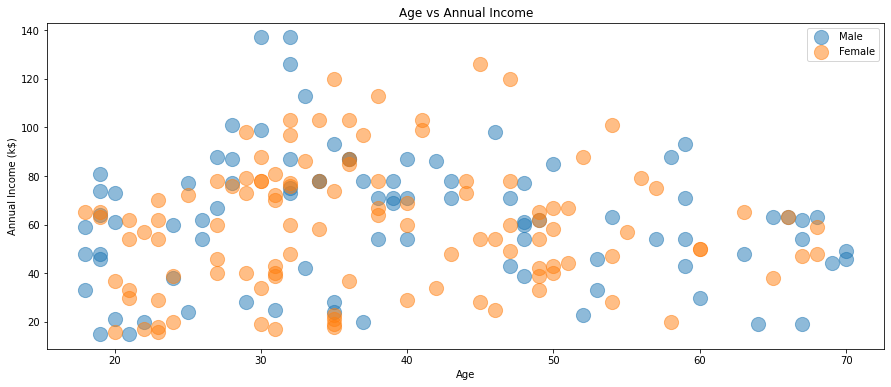

In [76]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = mall[mall['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income')
plt.legend()
plt.show()

In [93]:
mall_x = mall[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []

for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 200  , algorithm='elkan') )
    kmeans.fit(mall_x)
    inertia.append(kmeans.inertia_)


In [94]:
x_array =  np.array(mall_x)
print(x_array)

[[19 39]
 [21 81]
 [20  6]
 [23 77]
 [31 40]
 [22 76]
 [35  6]
 [23 94]
 [64  3]
 [30 72]
 [67 14]
 [35 99]
 [58 15]
 [24 77]
 [37 13]
 [22 79]
 [35 35]
 [20 66]
 [52 29]
 [35 98]
 [35 35]
 [25 73]
 [46  5]
 [31 73]
 [54 14]
 [29 82]
 [45 32]
 [35 61]
 [40 31]
 [23 87]
 [60  4]
 [21 73]
 [53  4]
 [18 92]
 [49 14]
 [21 81]
 [42 17]
 [30 73]
 [36 26]
 [20 75]
 [65 35]
 [24 92]
 [48 36]
 [31 61]
 [49 28]
 [24 65]
 [50 55]
 [27 47]
 [29 42]
 [31 42]
 [49 52]
 [33 60]
 [31 54]
 [59 60]
 [50 45]
 [47 41]
 [51 50]
 [69 46]
 [27 51]
 [53 46]
 [70 56]
 [19 55]
 [67 52]
 [54 59]
 [63 51]
 [18 59]
 [43 50]
 [68 48]
 [19 59]
 [32 47]
 [70 55]
 [47 42]
 [60 49]
 [60 56]
 [59 47]
 [26 54]
 [45 53]
 [40 48]
 [23 52]
 [49 42]
 [57 51]
 [38 55]
 [67 41]
 [46 44]
 [21 57]
 [48 46]
 [55 58]
 [22 55]
 [34 60]
 [50 46]
 [68 55]
 [18 41]
 [48 49]
 [40 40]
 [32 42]
 [24 52]
 [47 47]
 [27 50]
 [48 42]
 [20 49]
 [23 41]
 [49 48]
 [67 59]
 [26 55]
 [49 56]
 [21 42]
 [66 50]
 [54 46]
 [68 43]
 [66 48]
 [65 52]
 

In [95]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

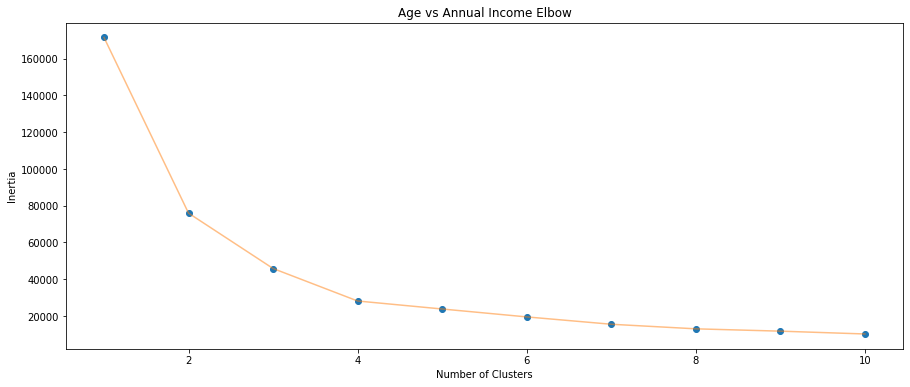

In [96]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('Age vs Annual Income Elbow')
plt.show()

In [97]:
kmeans = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 200  , algorithm='elkan') )

kmeans.fit(mall_x)
centroid = kmeans.cluster_centers_
mall["Cluster"] = kmeans.labels_
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [98]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

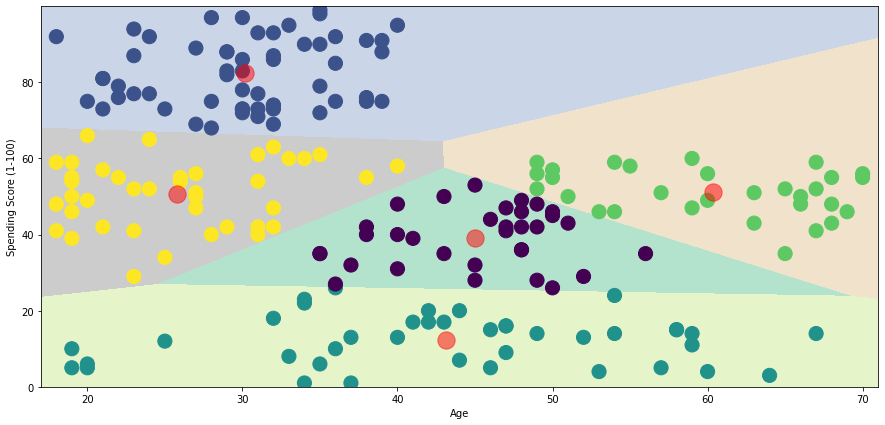

In [104]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = mall , c = kmeans.labels_ , s = 200 )
plt.scatter(x = centroid[: , 0] , y =  centroid[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [105]:
score = silhouette_score(x_scaled, kmeans.labels_, metric="euclidean")

score

0.37925752940376684

In [109]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

In [110]:
aglo_mall = StandardScaler().fit_transform(mall_x)
aglo_mall

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

In [148]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='complete')

In [149]:
agglom.fit(aglo_mall)
agglom.labels_

array([1, 2, 3, 2, 1, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 1, 1, 0, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 3, 2, 0, 2, 3, 2, 0, 2, 1, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 1, 2,
       3, 2])

In [150]:
dist_matrix = distance_matrix(aglo_mall,aglo_mall)
dist_matrix

array([[0.        , 1.63681098, 1.28312008, ..., 1.64822374, 1.23897718,
        1.88174846],
       [1.63681098, 0.        , 2.91250139, ..., 0.83489757, 2.57000762,
        0.65055018],
       [1.28312008, 2.91250139, 0.        , ..., 2.77678935, 0.9791273 ,
        3.07420269],
       ...,
       [1.64822374, 0.83489757, 2.77678935, ..., 0.        , 2.1740074 ,
        0.37772746],
       [1.23897718, 2.57000762, 0.9791273 , ..., 2.1740074 , 0.        ,
        2.5274803 ],
       [1.88174846, 0.65055018, 3.07420269, ..., 0.37772746, 2.5274803 ,
        0.        ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



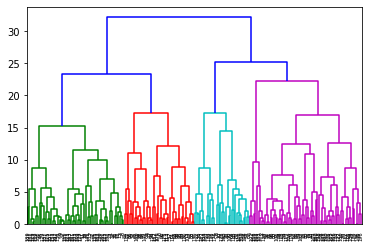

In [151]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

In [153]:
clusters = fcluster(Z, 4, criterion='maxclust')
metrics.silhouette_score(mall_x,clusters)

0.33181319560300765

In [134]:
aggloms = AgglomerativeClustering(n_clusters=4, linkage='single')

In [135]:
aggloms.fit(aglo_mall)
aggloms.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



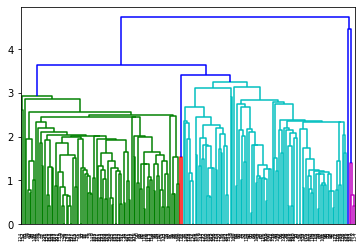

In [136]:
Zs = hierarchy.linkage(dist_matrix, 'single')
dendros = hierarchy.dendrogram(Zs)

In [140]:
clusters = fcluster(Zs, 4, criterion='maxclust')
metrics.silhouette_score(mall_x,clusters)

0.2934524619693467

In [142]:
aggloavg = AgglomerativeClustering(n_clusters=4, linkage='average')

In [143]:
aggloavg.fit(aglo_mall)
aggloavg.labels_

array([0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 0, 2, 0, 3, 0, 2, 0, 0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



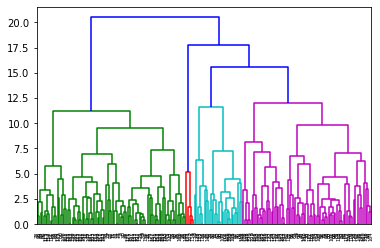

In [145]:
Zavg = hierarchy.linkage(dist_matrix, 'average')
dendravg = hierarchy.dendrogram(Zavg)

In [147]:
clusters = fcluster(Zavg, 4, criterion='maxclust')
metrics.silhouette_score(mall_x,clusters)

0.3145480865144147